In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
toyo=pd.read_csv(r"C:\Users\sidra\Downloads\Toyoto_Corrola.csv",encoding='latin1')
toyo

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÃTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


## EDA

In [3]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [4]:
toyo2=pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)
toyo2

,Price,Age_08_04,Doors,Gears
0,13500,23,3,5
1,13750,23,3,5
2,13950,24,3,5
3,14950,26,3,5
4,13750,30,3,5
...,...,...,...,...
1431,7500,69,3,5
1432,10845,72,3,5
1433,8500,71,3,5
1434,7250,70,3,5


In [5]:
toyo3=toyo2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyo3

,Price,Age,Doors,Gears
0,13500,23,3,5
1,13750,23,3,5
2,13950,24,3,5
3,14950,26,3,5
4,13750,30,3,5
...,...,...,...,...
1431,7500,69,3,5
1432,10845,72,3,5
1433,8500,71,3,5
1434,7250,70,3,5


In [6]:
toyo3[toyo3.duplicated()]

,Price,Age,Doors,Gears
28,16950,28,3,5
33,14950,26,3,5
36,15950,25,3,5
42,13950,22,3,5
50,17950,22,5,5
...,...,...,...,...
1423,7950,80,3,5
1424,7750,73,3,5
1427,8950,71,3,5
1433,8500,71,3,5


In [7]:
toyo4=toyo3.drop_duplicates().reset_index(drop=True)
toyo4

,Price,Age,Doors,Gears
0,13500,23,3,5
1,13750,23,3,5
2,13950,24,3,5
3,14950,26,3,5
4,13750,30,3,5
...,...,...,...,...
1145,8950,78,5,5
1146,8450,80,3,5
1147,7500,69,3,5
1148,10845,72,3,5


In [8]:
toyo4.describe()

,Price,Age,Doors,Gears
count,1150.000000,1150.000000,1150.000000,1150.000000
mean,10869.416522,54.862609,4.014783,5.030435
std,3766.385733,18.861972,0.945305,0.204252
min,4350.000000,1.000000,2.000000,3.000000
25%,8450.000000,43.000000,3.000000,5.000000
50%,9950.000000,59.000000,4.000000,5.000000
75%,11950.000000,69.000000,5.000000,5.000000
max,32500.000000,80.000000,5.000000,6.000000


## Correlation Analysis

In [9]:
toyo4.corr()

,Price,Age,Doors,Gears
Price,1.000000,-0.871280,0.173562,0.066025
Age,-0.871280,1.000000,-0.148077,-0.001399
Doors,0.173562,-0.148077,1.000000,-0.169112
Gears,0.066025,-0.001399,-0.169112,1.000000


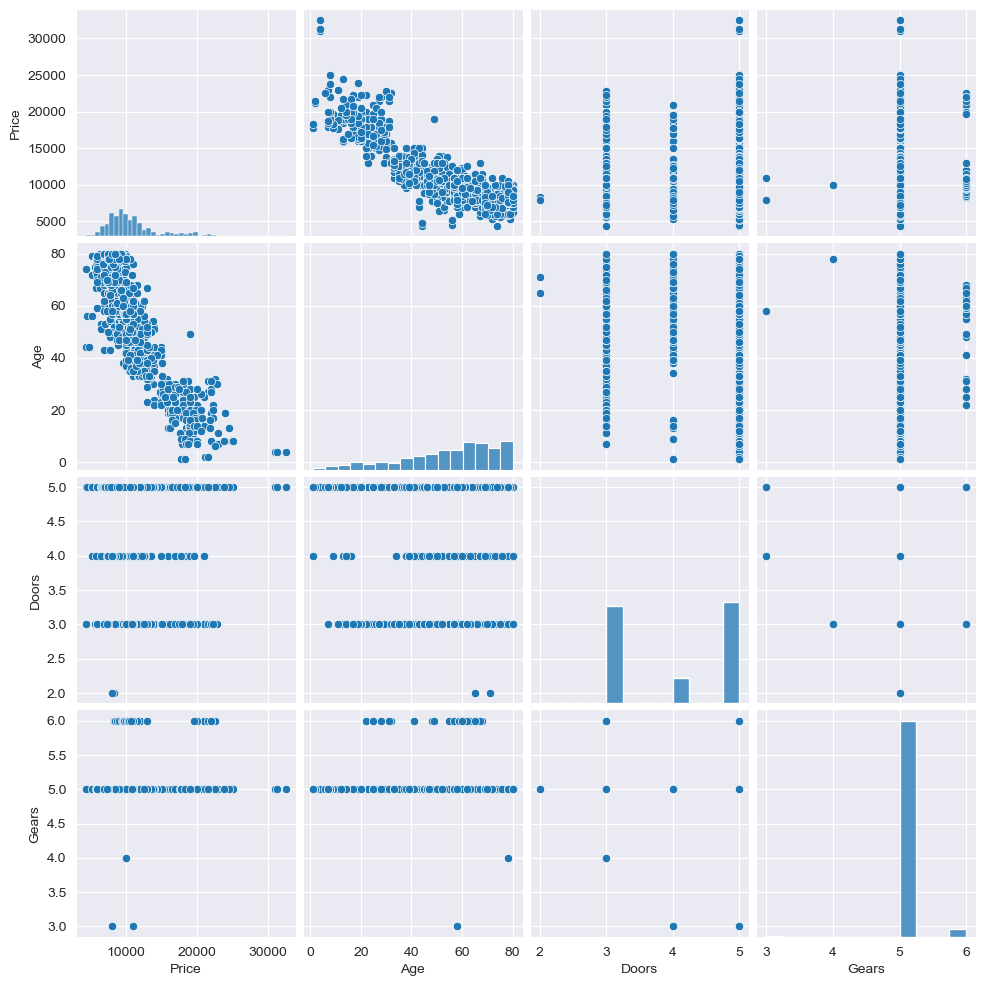

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(toyo4)

## Model Building

In [12]:
model=smf.ols('Price~Age+Doors+Gears',data=toyo4).fit()

## Model Testing

In [13]:
model.params

Intercept    12452.956442
Age           -172.228452
Doors          232.989638
Gears         1377.606464
dtype: float64

In [14]:
model.tvalues , np.round(model.pvalues,5)

(Intercept     8.764367
 Age         -59.746334
 Doors         3.992341
 Gears         5.157312
 dtype: float64,
 Intercept    0.00000
 Age          0.00000
 Doors        0.00007
 Gears        0.00000
 dtype: float64)

In [15]:
model.rsquared , model.rsquared_adj   # Model accuracy is 86.17%

(0.7665745933855563, 0.7659635321116965)

In [17]:
slr_d=smf.ols('Price~Doors',data=toyo4).fit()
slr_d.tvalues , slr_d.pvalues # Doors has significant pvalue

(Intercept    16.943617
 Doors         5.971274
 dtype: float64,
 Intercept    1.198107e-57
 Doors        3.134673e-09
 dtype: float64)

In [18]:
mlr_cd=smf.ols('Price~Gears+Doors',data=toyo4).fit()
mlr_cd.tvalues , mlr_cd.pvalues # CC & Doors have significant pvalue

(Intercept   -0.450286
 Gears        3.344045
 Doors        6.476831
 dtype: float64,
 Intercept    6.525897e-01
 Gears        8.523492e-04
 Doors        1.386559e-10
 dtype: float64)

## Model Validation Techniques 
### Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [20]:
rsq_age=smf.ols('Age~Doors+Gears',data=toyo4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_DR=smf.ols('Doors~Age+Gears',data=toyo4).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+Doors',data=toyo4).fit().rsquared
vif_GR=1/(1-rsq_GR)


# Putting the values in Dataframe format
d1={'Variables':['Age','Doors','Gears'],
    'Vif':[vif_age,vif_DR,vif_GR,]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.023171
1,Doors,1.053292
2,Gears,1.030199


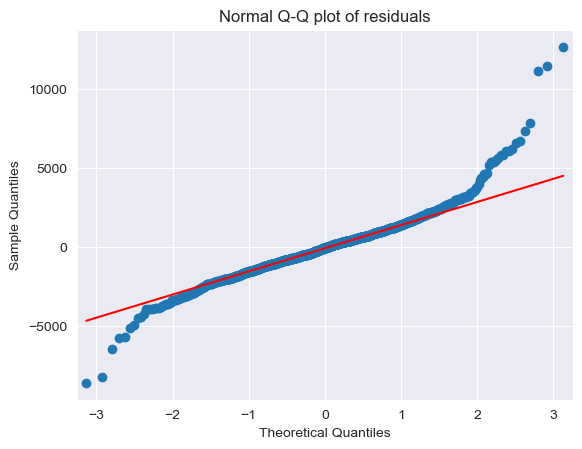

In [21]:
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [22]:
list(np.where(model.resid>6000))  

[array([  8,  14,  16,  48,  96,  97,  98, 125, 131, 450], dtype=int64)]

In [23]:
list(np.where(model.resid<-6000))

[array([169, 170, 337], dtype=int64)]

In [24]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

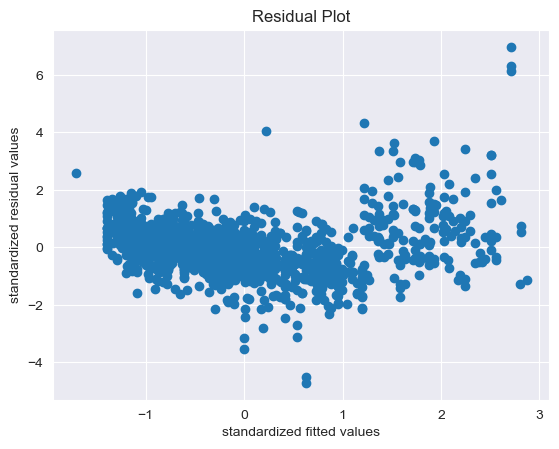

In [25]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

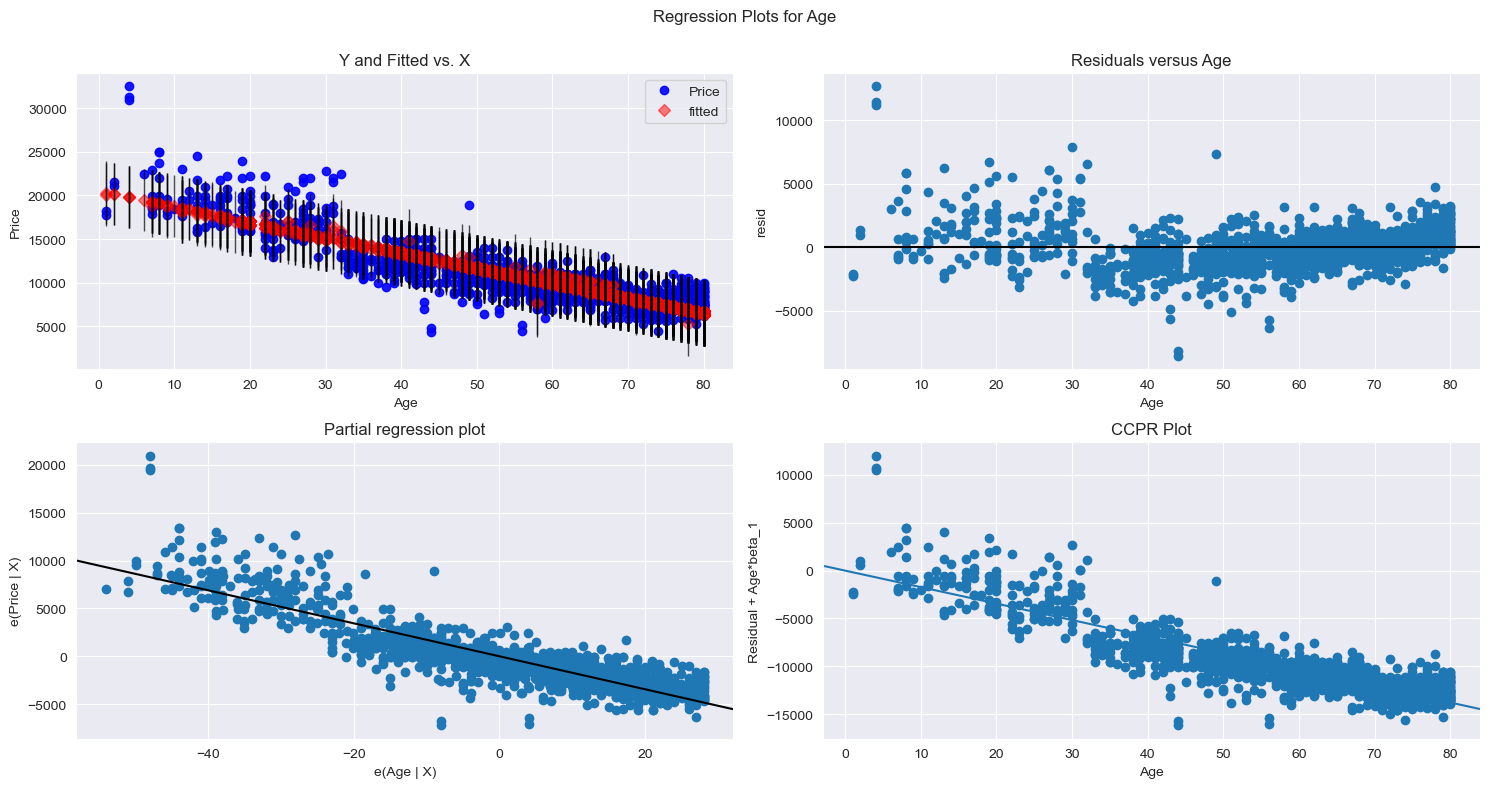

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

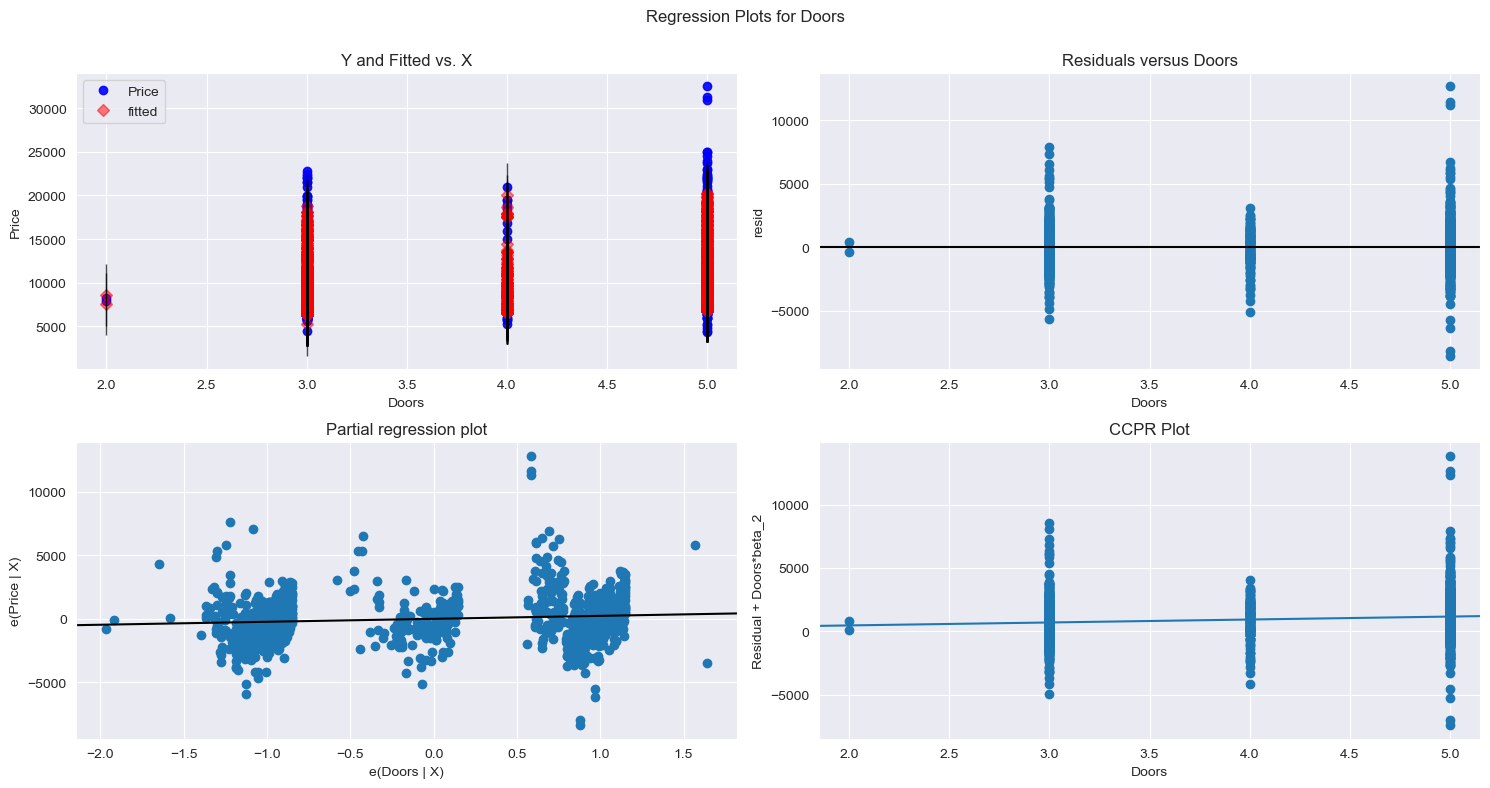

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

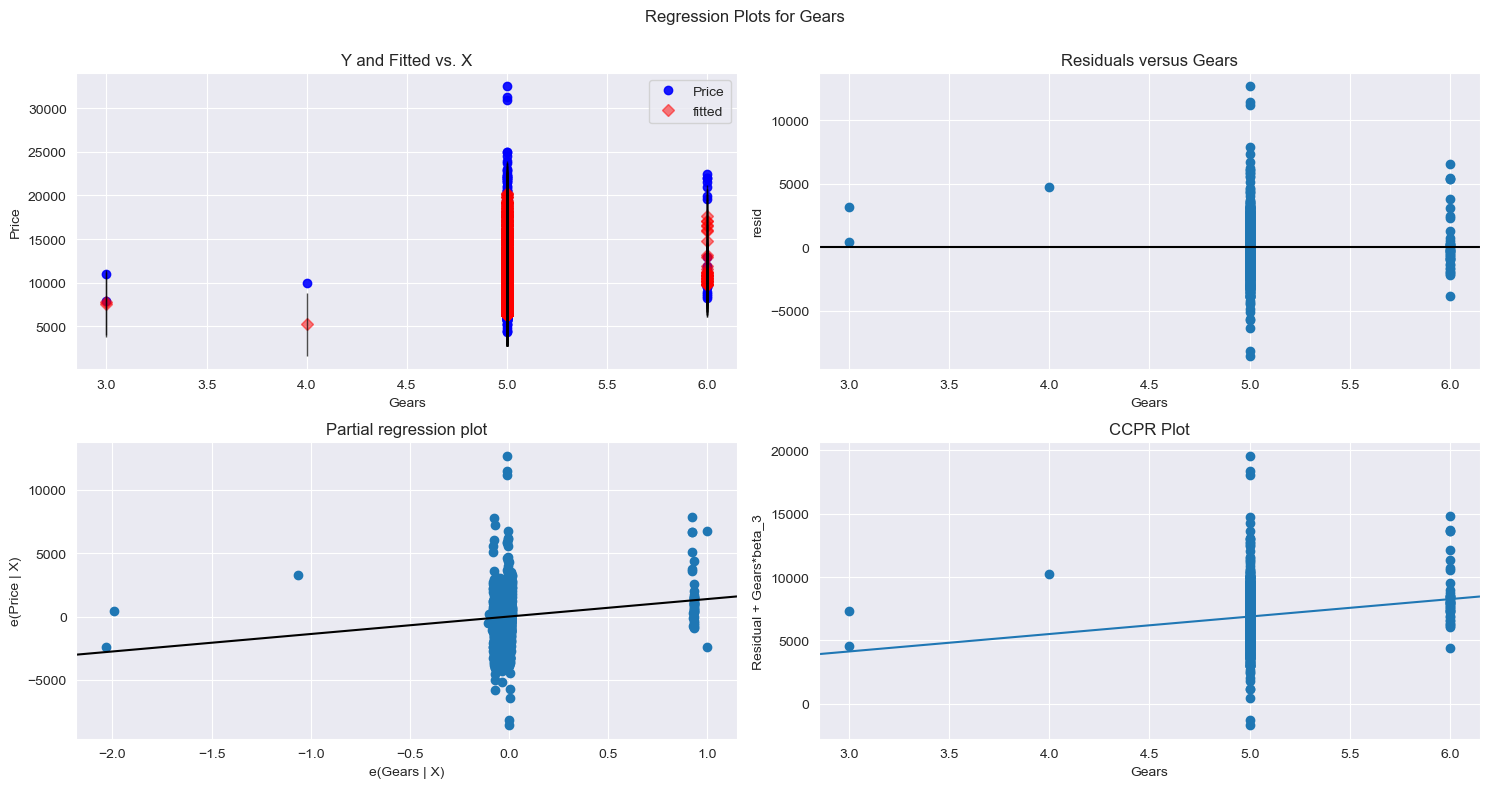

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

In [29]:
# 1. Cook's Distance
(c,_)=model.get_influence().cooks_distance
c

array([2.55032221e-03, 2.07979542e-03, 1.41722662e-03, ...,
       7.39906862e-05, 1.91190574e-03, 9.49192404e-05])

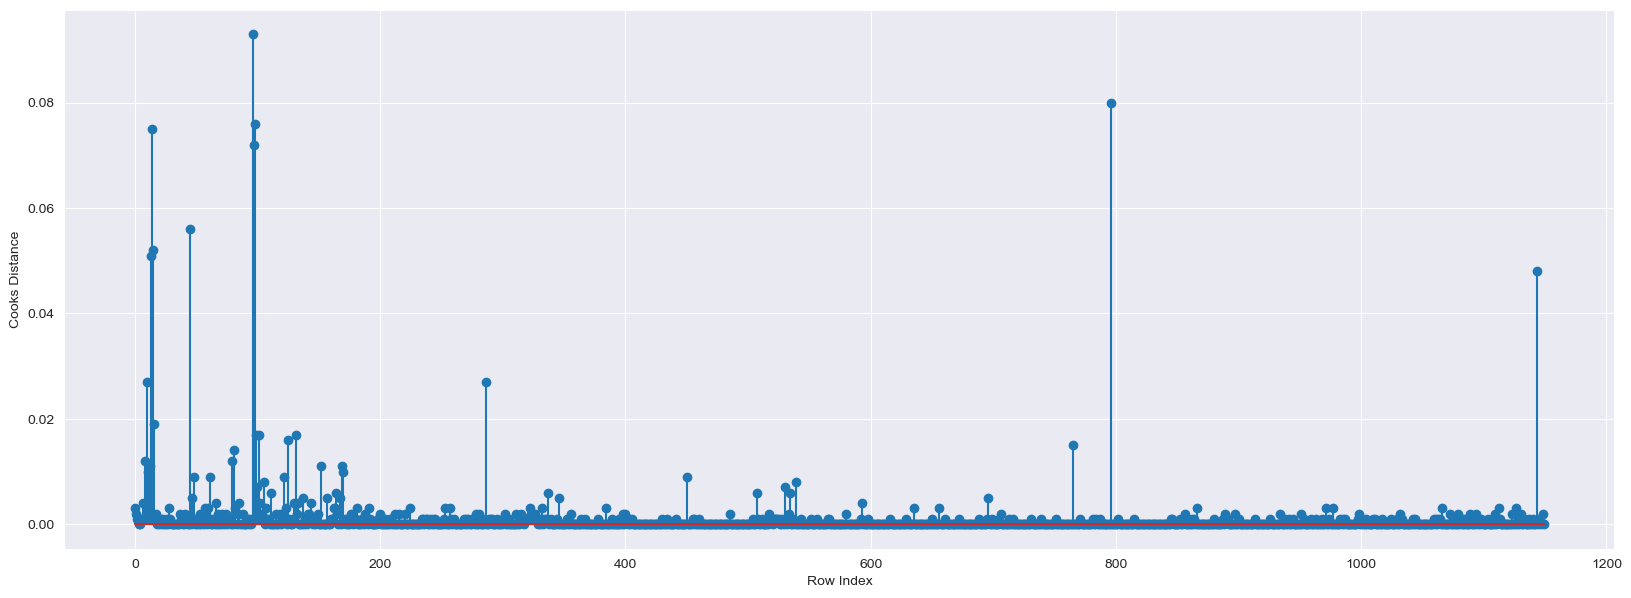

In [30]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyo4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
np.argmax(c) , np.max(c)

(96, 0.09306725602471265)

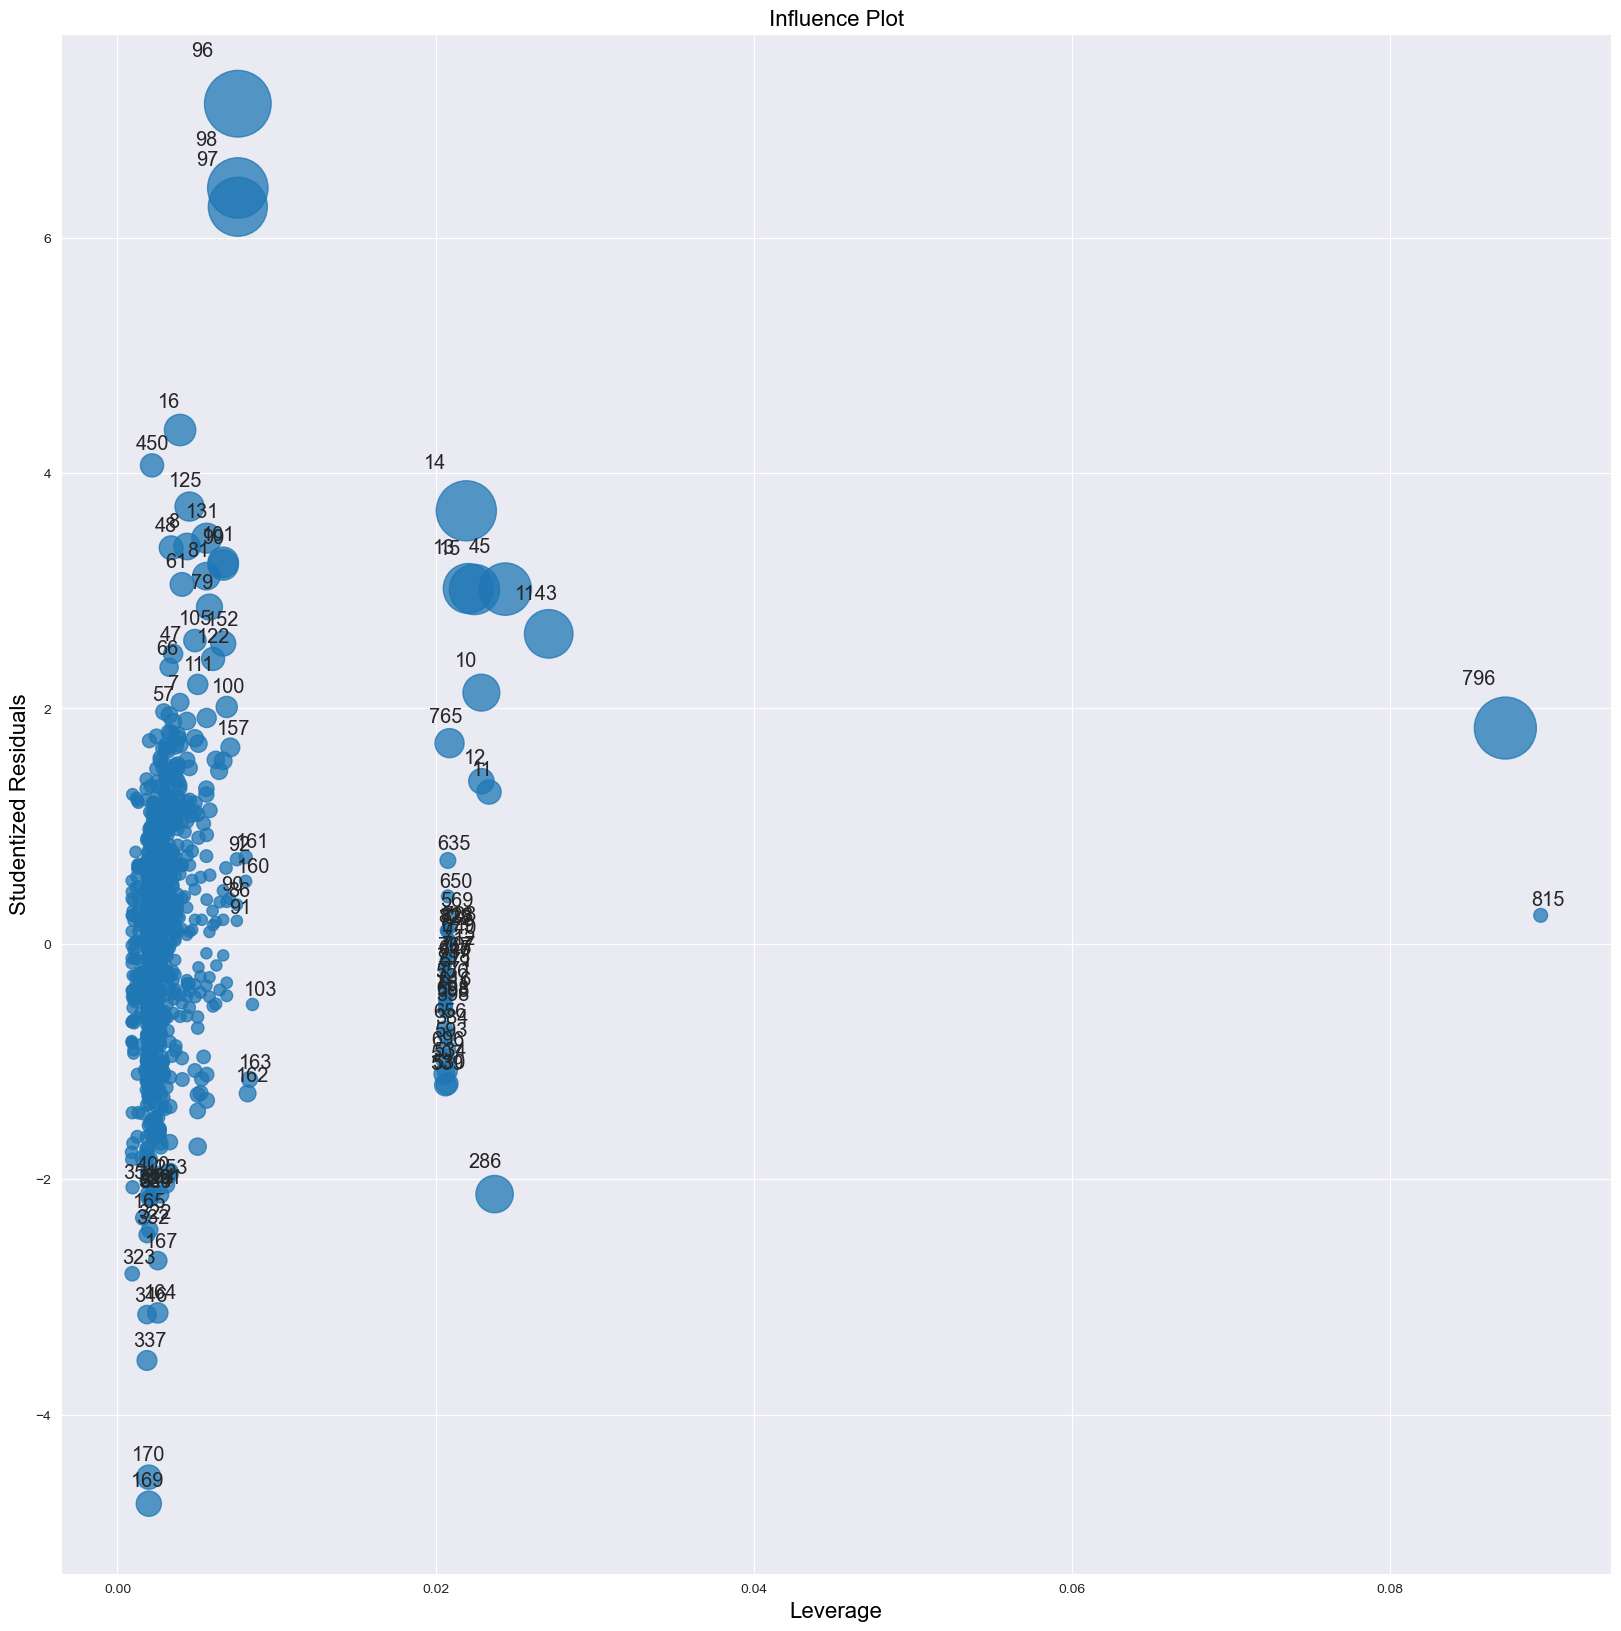

In [32]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [33]:
k=toyo4.shape[1]
n=toyo4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.013043478260869565

In [34]:
toyo4[toyo4.index.isin([80])] 

,Price,Age,Doors,Gears
80,16450,20,3,5


## Improving the Model

In [35]:
toyo_new=toyo4.copy()
toyo_new

,Price,Age,Doors,Gears
0,13500,23,3,5
1,13750,23,3,5
2,13950,24,3,5
3,14950,26,3,5
4,13750,30,3,5
...,...,...,...,...
1145,8950,78,5,5
1146,8450,80,3,5
1147,7500,69,3,5
1148,10845,72,3,5


In [36]:
toyo5=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo5

,Price,Age,Doors,Gears
0,13500,23,3,5
1,13750,23,3,5
2,13950,24,3,5
3,14950,26,3,5
4,13750,30,3,5
...,...,...,...,...
1144,8950,78,5,5
1145,8450,80,3,5
1146,7500,69,3,5
1147,10845,72,3,5


## Model Deletion Diagnostics and Final Model

In [38]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+Doors+Gears',data=toyo5).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        toyo5
    else:
        final_model=smf.ols('Price~Age+Doors+Gears',data=toyo5).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.7694516601917286
Thus model accuracy is improved to 0.7701646150739034
Thus model accuracy is improved to 0.770923201895406
Thus model accuracy is improved to 0.7735009835473163
Thus model accuracy is improved to 0.77609268711907
Thus model accuracy is improved to 0.7763603958883096
Thus model accuracy is improved to 0.7767004265800295
Thus model accuracy is improved to 0.7773337685669882
Thus model accuracy is improved to 0.7785888466939279
Thus model accuracy is improved to 0.7783283262939726
Thus model accuracy is improved to 0.7791021172753939
Thus model accuracy is improved to 0.7798272860467135
Thus model accuracy is improved to 0.7793131179883005
Thus model accuracy is improved to 0.7786704352410312
Thus model accuracy is improved to 0.7782413359056499
Thus model accuracy is improved to 0.7778154395616494
Thus model accuracy is improved to 0.7803138651771586
Thus model accuracy is improved to 0.7805227425179571
Thus model accuracy is improved

In [39]:
final_model.rsquared

0.9008830656790446

In [40]:
toyo5

,Price,Age,Doors,Gears
0,13500,23,3,5
1,13750,23,3,5
2,13950,24,3,5
3,12950,32,3,5
4,12950,29,3,5
...,...,...,...,...
539,8450,75,3,5
540,8150,76,4,5
541,7600,78,3,5
542,7950,80,4,5


## Model Predictions

In [41]:
new_data=pd.DataFrame({'Age':12,"Doors":4,"Gears":5,},index=[0])
new_data

,Age,Doors,Gears
0,12,4,5


In [42]:
final_model.predict(new_data)

0    15332.184702
dtype: float64

In [43]:
pred_y=final_model.predict(toyo5)
pred_y

0      13822.094580
1      13822.094580
2      13706.287388
3      12779.829855
4      13127.251430
           ...     
539     7800.120612
540     7920.524435
541     7452.699037
542     7457.295668
543     8147.542187
Length: 544, dtype: float64